In [3]:
from scipy.special import comb, perm

# W depends on m, na, and k

# we first need to know PNF of Y
# Y only depends on m and k
def Y_PMF(m, k):
    # Y value range is [1, k]
    prob_list = [1 / (m ** (k - 1))]
    # calcualte from 2 to k
    for y in range(2, k + 1):
        prob = (comb(m, y) * (y ** k)) / (m ** k)
        for i, prev_prob in enumerate(prob_list):
            # start from 0, change to start from 1
            i = i + 1
            prob -= prev_prob * comb(m - i, y - i)
        prob_list.append(prob)
    return prob_list

# we need the probability of z, conditioned on a and b
def Z_cond_a_b(z, a, b, m):
    if b > a:
        # make sure a \geq b
        a, b = b, a

    # We must have z > max(a, b)
    if z < a:
        return 0.0

    t = z - a
    prob = (perm(m, a) * comb(b, t) * perm(m - a, t) * perm(a, b - t)) / (perm(m, a) * perm(m, b))
    return prob

# the function return is the PMF of W
def W_PMF(m, na, k):
    Y_prob_list = Y_PMF(m, k)
    # print(f"Y prob list {Y_prob_list}")
    p0 = (1 - 1 / m) ** ((na - 1) * k)
    # print(f"p0 {p0}")
    # print(f"2k * p0 {2 * k * p0}")
    # w value range is [0, 2k]
    prob_list = []
    for w in range(0, 2 * k + 1):
        # print(f"w {w}")
        # calcualte probability for each w
        prob = 0.0
        for a in range(1, k + 1):
            for b in range(1, k + 1):
                for z in range(1, a + b + 1):
                    if z < max(a, b):
                        continue

                    n2 = 2 * z - a - b
                    if n2 < w:
                        continue

                    item1 = comb(n2, w) * (p0 ** w) * (1 - p0) ** (n2 - w)

                    item2 = Z_cond_a_b(z, a, b, m) * Y_prob_list[a - 1] * Y_prob_list[b - 1]

                    cur_prob = item1 * item2

                    # if w == 3 and cur_prob > 0.0:
                    #     print(f"z = {z}, a = {a}, b = {b}, w = {w}, prob = {cur_prob}")
                    #     print(f"item1 {item1} item2 {item2}")
                    #     print(f"Z cond {Z_cond_a_b(z, a, b, m)} Y1 {Y_prob_list[a - 1]} Y2 {Y_prob_list[a - 1]}")

                    prob += cur_prob

        prob_list.append(prob)
    return prob_list

def get_N_by_delta(m , na, k, delta):
    w_prob_list = W_PMF(m, na, k)
    print(f"W prob list {w_prob_list}")
    print(sum(w_prob_list))
    cumulation = 0.0
    for i, w_prob in enumerate(w_prob_list):
        cumulation += w_prob
        if cumulation >= (1 - delta):
            return i
    
    raise Exception("Cannot find N")

k = 3
# k = (m / n) ln2
# 3 / ln2 * n = m
log2m = 18
m = int(2 ** log2m)
na = int(1e5)

w_prob_list = W_PMF(m, na, k)

# delta_list = [1e-1, 1e-2, 1e-3, 1e-4]
# for delta in delta_list:
#     N = get_N_by_delta(m, na, k, delta)
#     print(f"log2m = {log2m}, na = {na}, k = {k}, delta = {delta}, N = {N}")


w_figs/w_pmf.pdf


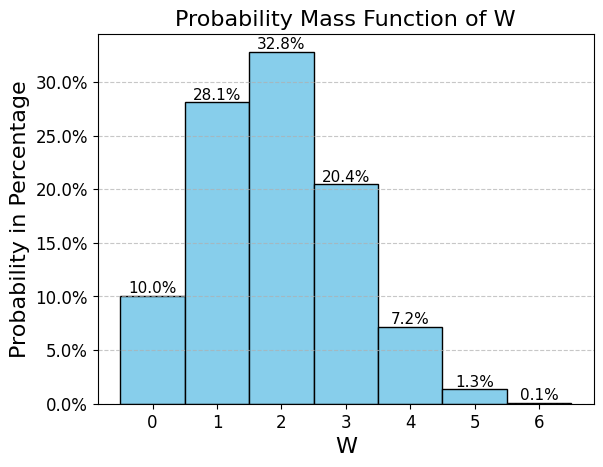

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os

font_size = 16

# Given probability distribution list
probabilities = w_prob_list

# Corresponding values of the random variable
values = list(range(len(probabilities)))

# Create figure and axis
fig, ax = plt.subplots()

# Plot the bar chart
bars = ax.bar(values, probabilities, color='skyblue', edgecolor='black', width=1.0)

# Set x-axis label
ax.set_xlabel('W', fontsize=font_size)
# Set y-axis label
ax.set_ylabel('Probability in Percentage', fontsize=font_size)
# Set chart title
ax.set_title('Probability Mass Function of W', fontsize=font_size)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.tick_params(axis='both', which='major', labelsize=12)

# Add probability values (as percentages) on top of the bars
for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    ax.annotate(f'{prob:.1%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=11)

# # Display the plot
# plt.show()


base_dir = "w_figs"
os.makedirs(base_dir, exist_ok=True)
save_name = "w_pmf.pdf"
save_path = os.path.join(base_dir, save_name)
print(save_path)
plt.savefig(save_path, format='pdf', bbox_inches='tight', pad_inches=0.05)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Given probability distribution list
# probabilities = [0.006843297018175506, 0.053173356912235084, 0.17215282099787266, 
#                  0.2972593708718608, 0.28872348389084956, 0.14956501212519302, 
#                  0.032282658183813484]

probabilities = w_prob_list

# Corresponding values of the random variable
values = list(range(len(probabilities)))

# Create figure and axis
fig, ax = plt.subplots()

# Plot the bar chart
bars = ax.bar(values, probabilities, color='skyblue', edgecolor='black', width=1.0)

# Set x-axis label
ax.set_xlabel('Random Variable Values', fontsize=14)

# Set y-axis label
ax.set_ylabel('Probability', fontsize=14)

# Set chart title
ax.set_title('Probability Histogram of Discrete Distribution', fontsize=16)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Add probability values (as percentages) on top of the bars with closer offset and larger font size
for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    ax.annotate(f'{prob:.1%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  # 1 point vertical offset
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=11)

# Display the plot
plt.show()


NameError: name 'w_prob_list' is not defined

[0.0, 0.0, 0.004, 0.018000000000000002, 0.059000000000000004, 0.161, 0.323, 0.527, 0.6970000000000001, 0.8490000000000001, 0.9410000000000001, 0.9850000000000001, 0.9960000000000001, 0.9990000000000001, 1.0, 1.0]


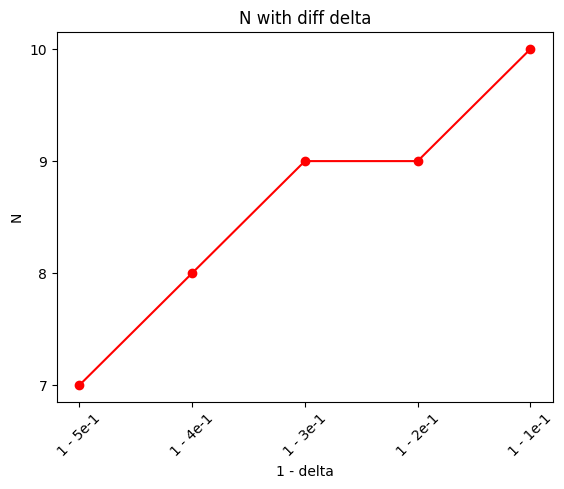

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

cumulative_list = []
cur_cumulate = 0.0
for count_percentage in count_list:
    cur_cumulate += count_percentage
    cumulative_list.append(cur_cumulate)

print(cumulative_list)
cumulative_list = np.array(cumulative_list)

quantile_range = [1 - 5e-1, 1 - 4e-1, 1 - 3e-1, 1 - 2e-1, 1 - 1e-1]
quantile_number_list = []
for quantile in quantile_range:
    # print(cumulative_list >= quantile)
    quantile_number_list.append(np.argmax(cumulative_list >= quantile))
    # print(np.argmax(cumulative_list >= quantile))
    # break
    # quantile_number_list.append(np.argmax(cumulative_list >= quantile))

fake_x = [(i + 1) for i in range(len(quantile_number_list))]
real_x = ["1 - 5e-1", "1 - 4e-1", "1 - 3e-1", "1 - 2e-1", "1 - 1e-1"]


plt.figure()

plt.plot(fake_x, quantile_number_list, 'ro-')

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fake_x, real_x, rotation=45)

plt.xlabel('1 - delta')
plt.ylabel('N')

plt.title("N with diff delta")

plt.show()


